# We have to make a machine learning model to predict fare_amount

We will do EDA and apply various techniques 



In [36]:
# pandas library to read and preprocess data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [37]:
model = pd.read_csv("C:\\Users\\muidc\\Downloads\\uber.csv")

In [38]:
model.head(3)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1


In [39]:
model.tail(3)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


# Data Pre-Processing

In [40]:
model['key'].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
199995    False
199996    False
199997    False
199998    False
199999    False
Name: key, Length: 200000, dtype: bool

In [41]:
model['key'].describe()

count                          200000
unique                         200000
top       2015-05-07 19:52:06.0000003
freq                                1
Name: key, dtype: object

No duplicate value is present in Key column and no data insight 

In [42]:
# checking for any missing values
model.isnull().sum() 

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [43]:
model['Unnamed: 0'].describe()

count    2.000000e+05
mean     2.771250e+07
std      1.601382e+07
min      1.000000e+00
25%      1.382535e+07
50%      2.774550e+07
75%      4.155530e+07
max      5.542357e+07
Name: Unnamed: 0, dtype: float64

In [44]:
model['Unnamed: 0'].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
199995    False
199996    False
199997    False
199998    False
199999    False
Name: Unnamed: 0, Length: 200000, dtype: bool

In [45]:
# Dropping Uncessary Data that wont effec

model.drop(['Unnamed: 0'], axis =1, inplace=True)
model.drop(['key'],axis=1, inplace=True)

In [46]:
# dropping all the null value
model = model.dropna()

In [47]:
#Checking null data is removed
model.isnull().sum()


fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [48]:
# checking for respective data types
model.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [49]:
model.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

# Checking For Outliers
# in this case trips where longitude and latitude values are too large and small 

In [50]:
print("drop_off latitude min value",model["dropoff_latitude"].min())
print("drop_off latitude max value",model["dropoff_latitude"].max())
print("drop_off longitude min value", model["dropoff_longitude"].min())
print("drop_off longitude max value",model["dropoff_longitude"].max())
print("pickup latitude min value",model["pickup_latitude"].min())
print("pickup latitude max value",model["pickup_latitude"].max())
print("pickup longitude min value",model["pickup_longitude"].min())
print("pickup longitude max value",model["pickup_longitude"].max())


drop_off latitude min value -881.9855130000001
drop_off latitude max value 872.6976279999999
drop_off longitude min value -3356.6663
drop_off longitude max value 1153.5726029999998
pickup latitude min value -74.01551500000001
pickup latitude max value 1644.421482
pickup longitude min value -1340.64841
pickup longitude max value 57.418457


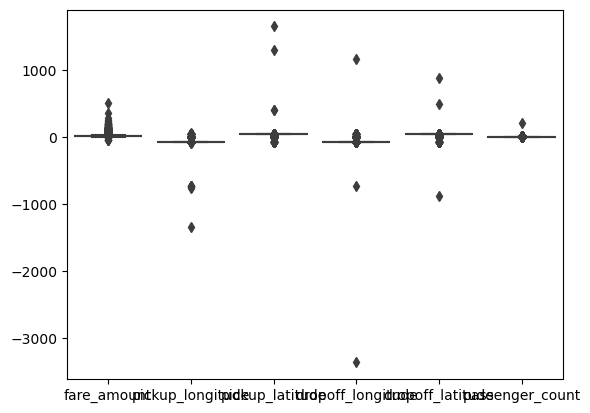

In [51]:
sns.boxplot(model, palette="Paired")
plt.show()

<Axes: xlabel='dropoff_longitude'>

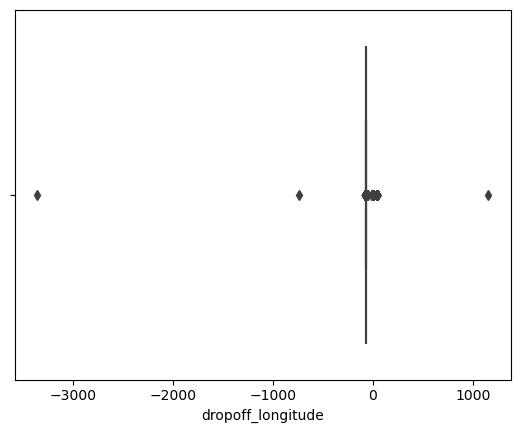

In [52]:
sns.boxplot( x = "dropoff_longitude", data = model)

# Data Manipulation

extracting date and time values individually from pickup_datetime

In [54]:
# pandas .to_datetime method lets you extract date and time values from a timestamp

model['year'] = pd.to_datetime(model['pickup_datetime']).dt.year
model['month'] = pd.to_datetime(model['pickup_datetime']).dt.month
model['week'] = pd.to_datetime(model['pickup_datetime']).dt.week
model['day'] = pd.to_datetime(model['pickup_datetime']).dt.day
model['hour'] = pd.to_datetime(model['pickup_datetime']).dt.hour
model['minute'] = pd.to_datetime(model['pickup_datetime']).dt.minute

C:\Users\muidc\AppData\Local\Temp\ipykernel_1448\1336435963.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  model['week'] = pd.to_datetime(model['pickup_datetime']).dt.week


In [55]:
# extracting weekday 
model['weekday'] = pd.to_datetime(model['pickup_datetime']).dt.dayofweek

In [56]:
model.head(4)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,week,day,hour,minute,weekday
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,19,7,19,52,3
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,29,17,20,4,4
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,35,24,21,45,0
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,26,8,22,4


In [57]:
model.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'week', 'day', 'hour', 'minute', 'weekday'],
      dtype='object')

<Axes: xlabel='year', ylabel='fare_amount'>

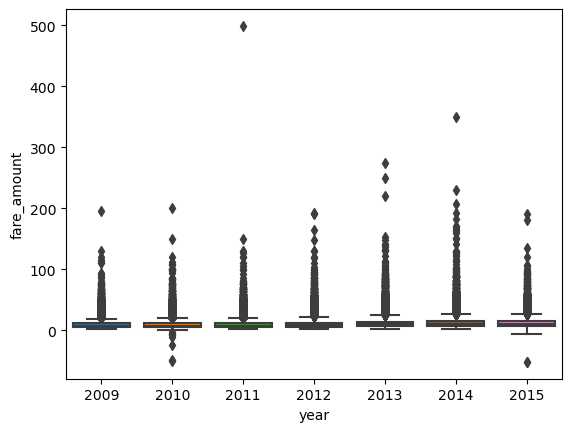

In [58]:
sns.boxplot(x='year', y ='fare_amount', data=model)

In [59]:
model[(model['year'] == '2011') & (model['fare_amount'] >=200)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,week,day,hour,minute,weekday


In [60]:
# making a copy of the original dataset to use on the safe side

model1=model.copy(deep=True)
model1

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,week,day,hour,minute,weekday
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,19,7,19,52,3
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,29,17,20,4,4
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,35,24,21,45,0
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,26,8,22,4
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,35,28,17,47,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,43,28,10,49,6
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,11,14,1,9,4
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,27,29,0,42,0
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,21,20,14,56,2


In [61]:
# actual timestamp dropped from  as we have created separate columns from it

model1.drop('pickup_datetime', axis=1, inplace=True)

In [62]:
model1

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,week,day,hour,minute,weekday
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,19,7,19,52,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,29,17,20,4,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,35,24,21,45,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,26,8,22,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,35,28,17,47,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,43,28,10,49,6
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,11,14,1,9,4
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,27,29,0,42,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,21,20,14,56,2


# Getting distance travelled in each trip by using location co-ordinates

using the haversine formula 

hav(θ) = 1-cosθ/2 which is sin**2(θ/2)
hav(θ) = sin**2(θ/2)

In [63]:
import math

In [64]:
import math
# function to calculate the travel distance from the longitudes and latitudes
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(math.radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = math.sin(dist_lati/2)**2 + math.cos(lati1) * math.cos(lati2) * math.sin(dist_long/2)**2
        c = 2 * math.asin(math.sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

Now we create separate distance variable in our dataset

In [65]:
model1['dist_travel_km'] = distance_transform(model1['pickup_longitude'].to_numpy(),
                                                model1['pickup_latitude'].to_numpy(),
                                                model1['dropoff_longitude'].to_numpy(),
                                                model1['dropoff_latitude'].to_numpy()
                                              )

In [66]:
model1.head(3)    #New distance column is added

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,week,day,hour,minute,weekday,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,19,7,19,52,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,29,17,20,4,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,35,24,21,45,0,5.036377


# Exploratory Data Analysis

In [67]:
#importing required libraries for plotting visuals and styling
 
import seaborn as sns   
import matplotlib.pyplot as plt
import numpy as np

A heatmap correlation helps show dependency of each variable on one another

<Axes: >

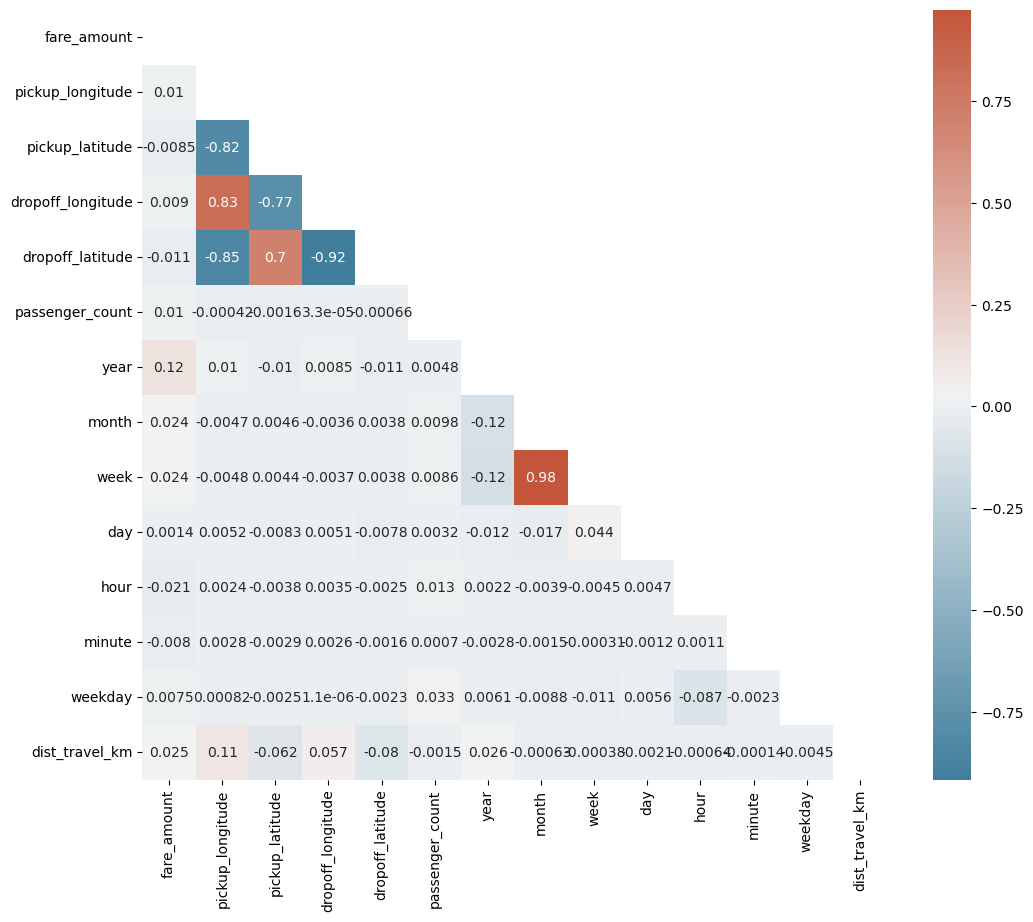

In [68]:
# Correlation between different variables
corr = model1.corr()

# Setting up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

# Univariate Analysis

using distplot to see the distribution of rides by different time variables

C:\Users\muidc\AppData\Local\Temp\ipykernel_1448\3597184417.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(model1['year'],kde=True, rug=True, rug_kws={"color": "g"},


Text(0.5, 1.0, 'yearwise distribution of rides')

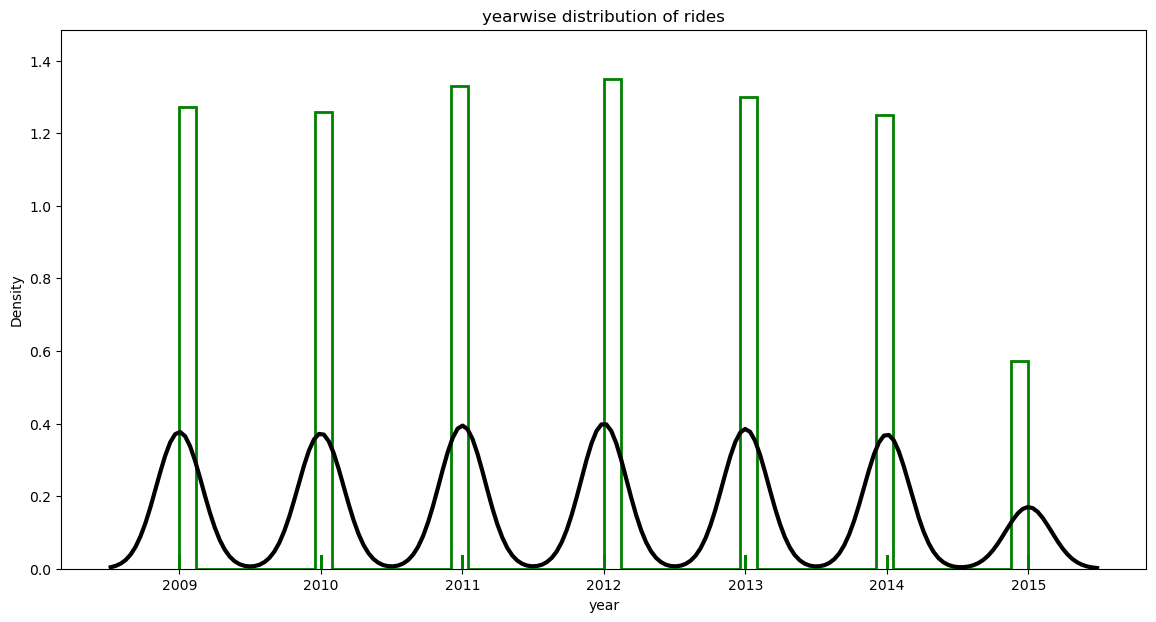

In [69]:
plt.figure(figsize=(14,7))
ax = sns.distplot(model1['year'],kde=True, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 2,
                            "alpha": 1, "color": "g"})
plt.title('yearwise distribution of rides')

C:\Users\muidc\AppData\Local\Temp\ipykernel_1448\845406791.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(model1['weekday'],kde=True, rug=True, rug_kws={"color": "g"},


Text(0.5, 1.0, 'weekday distribution of rides')

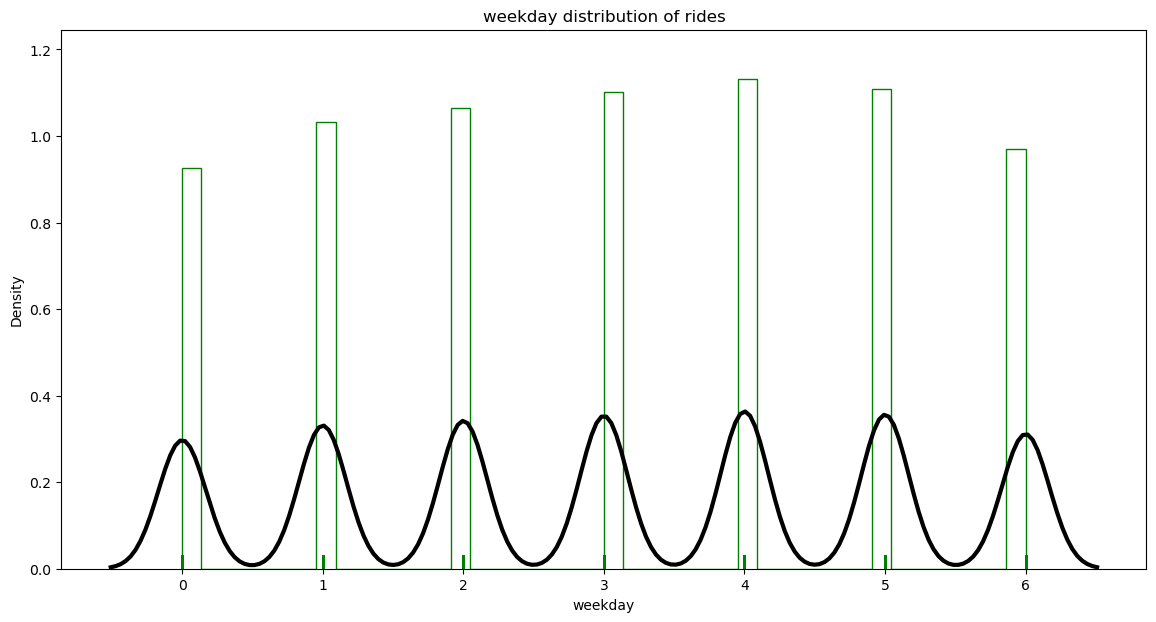

In [70]:
plt.figure(figsize=(14,7))
ax = sns.distplot(model1['weekday'],kde=True, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 1,
                            "alpha": 1, "color": "g"})
plt.title('weekday distribution of rides')

using countplots to see sount of different time variables

<Axes: title={'center': 'Cab trips count during week days'}, xlabel='hour', ylabel='count'>

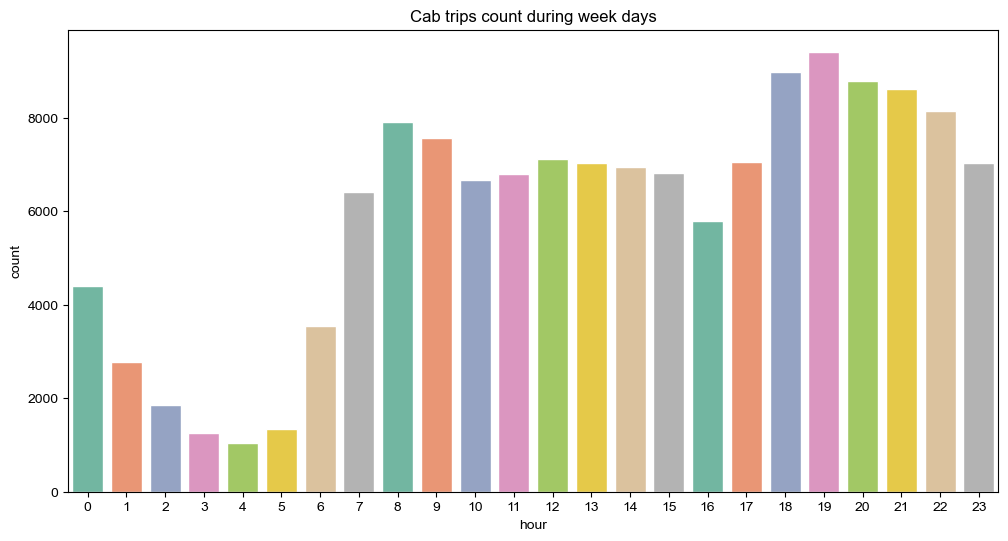

In [71]:
# Set the figure size, grid type and color palette along with appropraite titel for the plot
plt.figure(figsize=(12,6))
plt.title('Cab trips count during week days')
sns.set_style("dark")


#countplot for weekdays
sns.countplot(x='hour', data=model1.loc[(model.weekday >= 0) & (model1.weekday <=4)], palette='Set2')


Weekends countplot plotting 

<Axes: title={'center': 'Cab trips count during week ends'}, xlabel='hour', ylabel='count'>

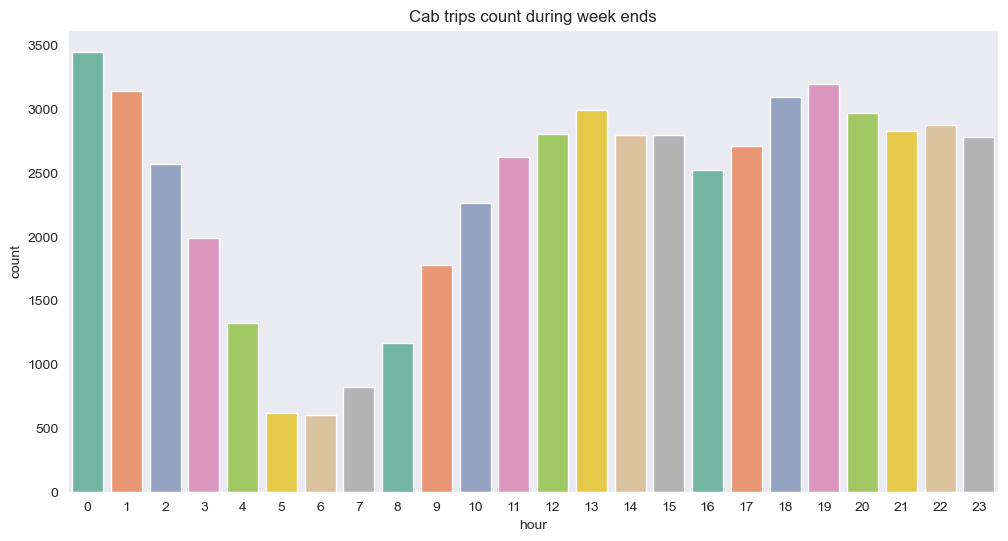

In [72]:
# Set the figure size, grid type and color palette along with appropraite titel for the plot
plt.figure(figsize=(12,6))
plt.title('Cab trips count during week ends')
sns.set_style("dark")

#countplot for weekends

sns.countplot(x='hour', data=model1.loc[(model1.weekday >= 5) & (model1.weekday <=6)], palette='Set2')

checking count of passengers in each ride

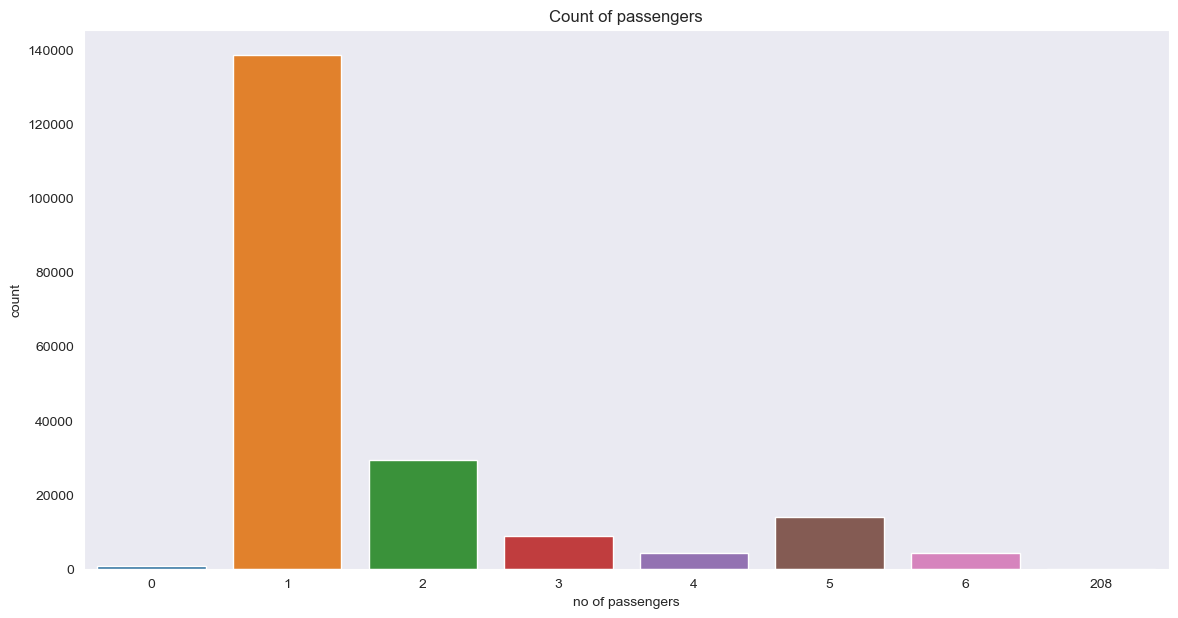

In [73]:
plt.figure(figsize=(14,7))
sns.countplot(data=model1, x='passenger_count')
plt.title('Count of passengers')
plt.xlabel('no of passengers')
plt.show()

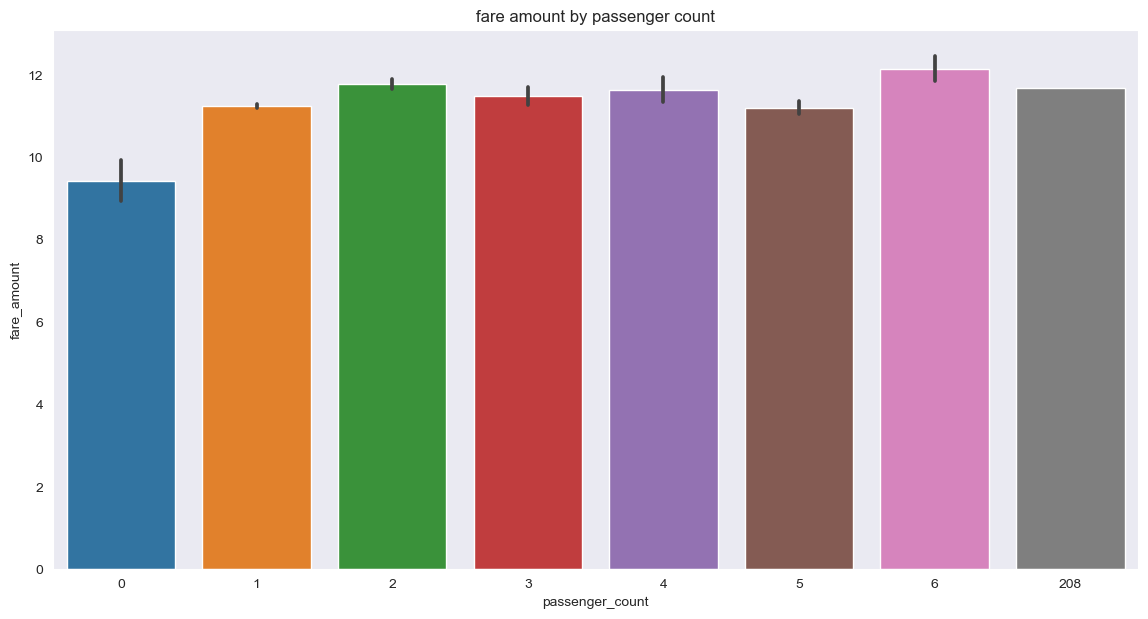

In [74]:
plt.figure(figsize=(14,7))
fig=sns.barplot(data=model1,y='fare_amount',x='passenger_count')
plt.title('fare amount by passenger count')
plt.show()

# Bivariate Analysis

plotting fare prices by the distance travelled in each ride

<Axes: title={'center': 'Fare Amount distribution by Co-ordinates/ Distance'}, xlabel='fare amount', ylabel='distance travelled by a ride in km'>

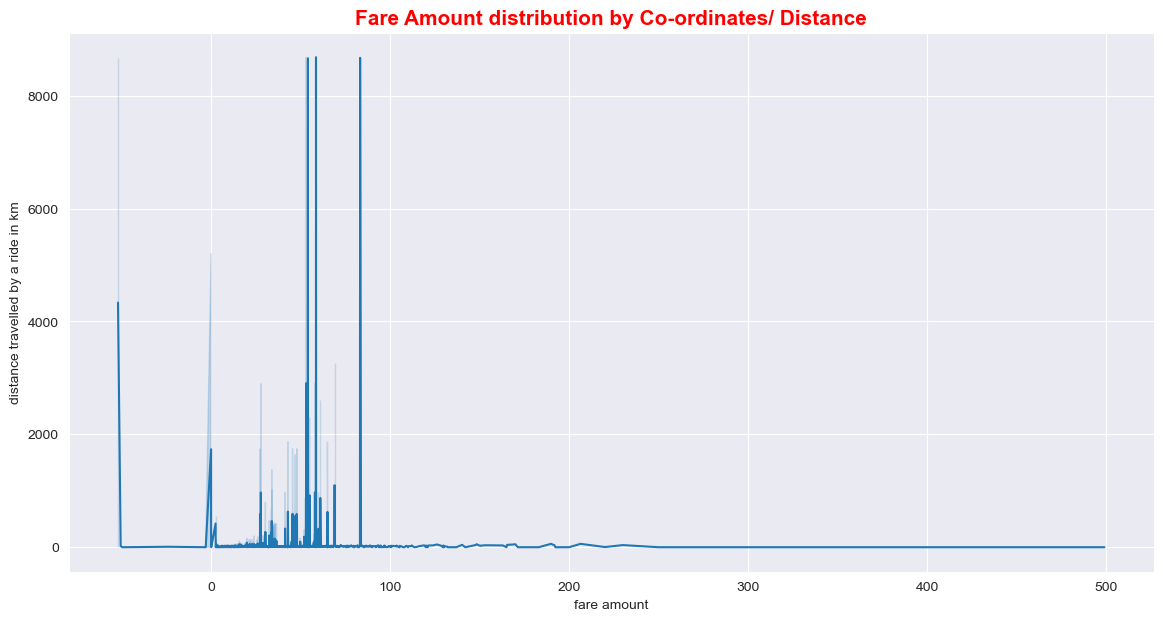

In [75]:
plt.figure(figsize=(14,7))
plt.grid()
plt.xlabel('fare amount')
plt.ylabel('distance travelled by a ride in km')
plt.title('Fare Amount distribution by Co-ordinates/ Distance', fontsize=15, color='red', fontweight='bold')

sns.lineplot(y=model1['dist_travel_km'], x=model1['fare_amount'], markers='o')

Scatterplots are to show how much one variable is affected by another, datapoints represented by markers

scatterplot showing yearwise distribution of fare amount

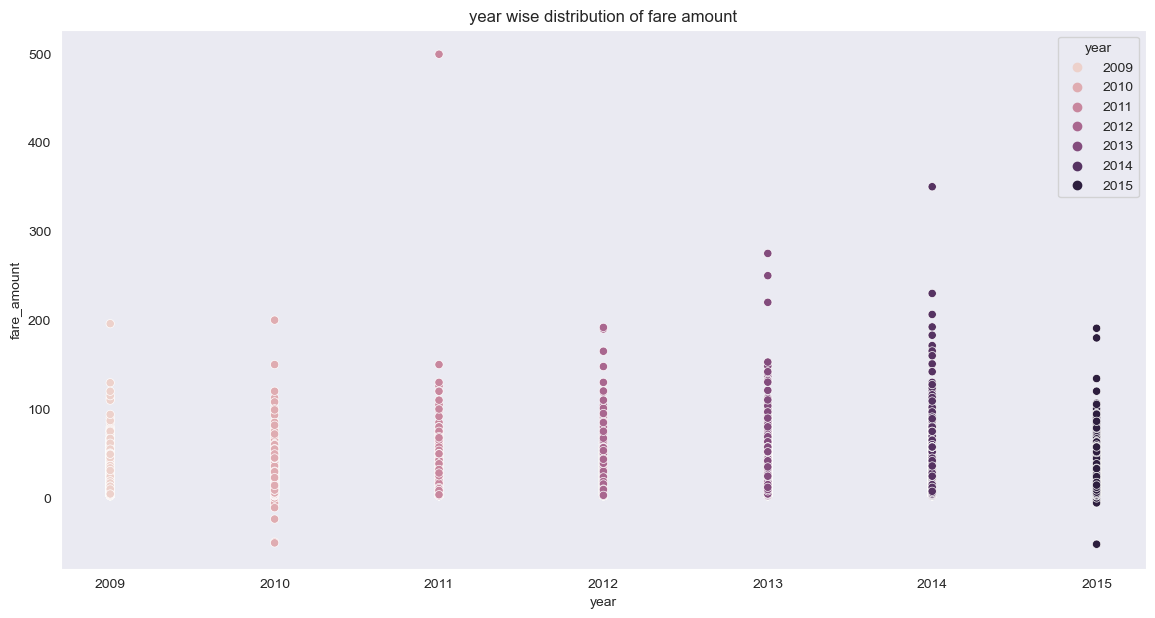

In [76]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=model1,
 x='year',
  y='fare_amount',
   hue='year',
    markers='o')
plt.title('year wise distribution of fare amount')
plt.show()

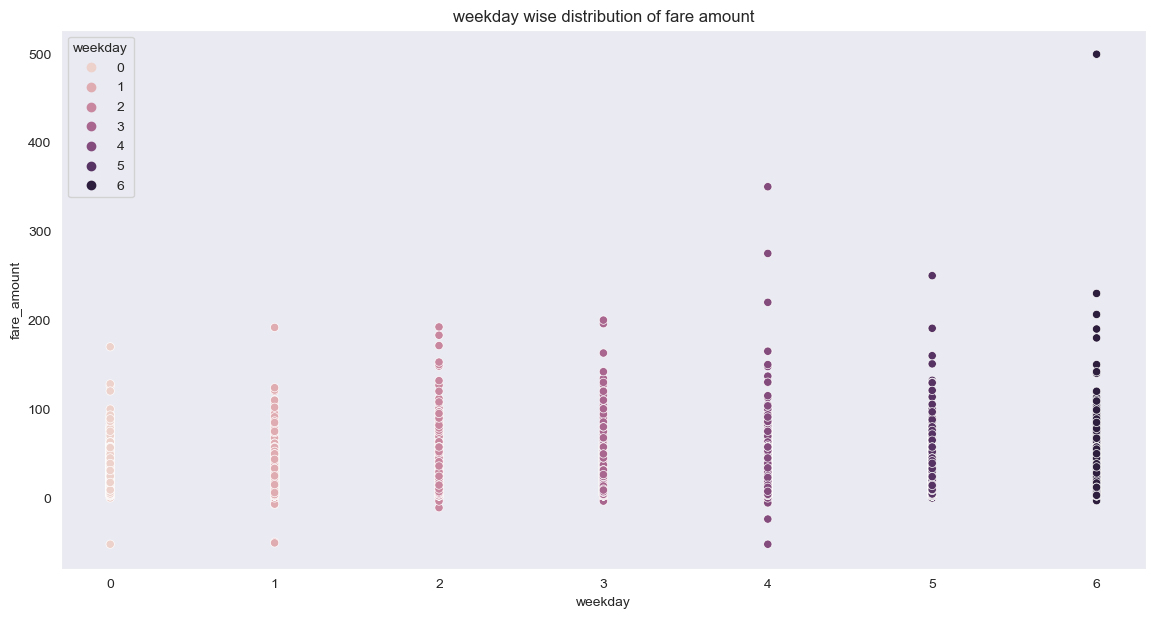

In [77]:
# scatterplot showing weekday distribution of fare amount


plt.figure(figsize=(14,7))
sns.scatterplot(data=model1,
 x='weekday',
  y='fare_amount',
   hue='weekday',
    markers='o')
plt.title('weekday wise distribution of fare amount')
plt.show()
# 0 is for monday and so on

Interactive Geographical Maps

In [ ]:
# pickup locations of rides by geographical map

import plotly.express as px   #library to built interactive plots

fig=px.density_mapbox(model1,
 lat='pickup_latitude',
  lon='pickup_longitude',
   mapbox_style='stamen-terrain',
    zoom=2.5,
     radius=1,
         center=dict(lat=0, lon=180), title='pickup locations')
fig.show()

In [ ]:
fig=px.density_mapbox(model1,
 lat='dropoff_latitude',
  lon='dropoff_longitude',
   mapbox_style='stamen-terrain',
    zoom=2.5,
     radius=1,
         center=dict(lat=0, lon=180), title='dropoff locations')
fig.show()

# Model Building

declaring values to x and y variables

In [80]:
x = model1.drop('fare_amount',axis=1)     # all the data excepting fare amount is assigned to the x variable
y = model1['fare_amount']                 # y takes the variable to be predicted, fare amount

In [81]:
import numpy as np

converting data into an array

In [82]:

x = np.array(x)
y = np.array(y)


In [83]:
x.shape, y.shape     # Checking dimension

((199999, 13), (199999,))

In [84]:
x.ndim, y.ndim

(2, 1)

In [85]:
x

array([[-73.99981689,  40.73835373, -73.99951172, ...,  52.        ,
          3.        ,   1.68332275],
       [-73.994355  ,  40.728225  , -73.99471   , ...,   4.        ,
          4.        ,   2.45758988],
       [-74.005043  ,  40.74077   , -73.962565  , ...,  45.        ,
          0.        ,   5.03637719],
       ...,
       [-73.986017  ,  40.756487  , -73.858957  , ...,  42.        ,
          0.        ,  12.85031912],
       [-73.99712372,  40.72545242, -73.98321533, ...,  56.        ,
          2.        ,   3.53971545],
       [-73.984395  ,  40.720077  , -73.985508  , ...,   8.        ,
          5.        ,   5.41778348]])

In [86]:
y

array([ 7.5,  7.7, 12.9, ..., 30.9, 14.5, 14.1])

Splitting the data into training and testing subset

In [87]:
from sklearn.model_selection import train_test_split

'test_size' returns the proportion of data to be included in the test set in percents, here 30%

'random_state' to generate the same dataset each time you run the code

In [88]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=101)


In [89]:
# print dimension of original dataset

print("shape of original dataset :", model1.shape) 

# print dimension of predictors train set
print('shape of x_train : ', x_train.shape)

# print dimension of predictors test set
print('shape of x_test : ', x_test.shape)

# print dimension of target train set
print('shape of x_test : ', y_train.shape)

# print dimension of target test set
print('shape of y_test : ', y_test.shape)

shape of original dataset : (199999, 14)
shape of x_train :  (139999, 13)
shape of x_test :  (60000, 13)
shape of x_test :  (139999,)
shape of y_test :  (60000,)


In [90]:
x_train.ndim, x_test.ndim, y_train.ndim, y_test.ndim
# checking dimensions of respective data

(2, 2, 1, 1)

# Linear Regression Model

In [91]:
from sklearn.linear_model import LinearRegression
# library for linear regression model

In [92]:
linmodel = LinearRegression()

In [93]:
linmodel.fit(x_train,y_train)      #fitting the train data set into model

LinearRegression()

In [94]:
x_test

array([[-73.98281   ,  40.771687  , -73.977065  , ...,  32.        ,
          1.        ,   1.06050449],
       [-73.991985  ,  40.725763  , -73.995762  , ...,  16.        ,
          6.        ,   3.79776192],
       [-73.98573   ,  40.767882  , -73.998525  , ...,  17.        ,
          6.        ,   1.3434399 ],
       ...,
       [-73.987723  ,  40.737604  , -73.995877  , ...,  58.        ,
          2.        ,   1.56235101],
       [-73.948859  ,  40.781663  , -73.985242  , ...,  43.        ,
          4.        ,   4.87273081],
       [-73.995006  ,  40.74001   , -73.976089  , ...,  55.        ,
          6.        ,   5.67189609]])

Checking the prediction

In [95]:
y_pred = linmodel.predict(x_test)
y_pred

array([11.75496789, 10.26067405, 12.69330096, ...,  8.91581634,
       11.46043754, 11.0587145 ])

In [96]:
linmodel.score(x_test,y_test)

0.016797694458628

In [97]:
from sklearn import metrics

In [98]:
# calculate mae
mae = metrics.mean_absolute_error(y_test,y_pred)

#calculate mse
mse = metrics.mean_squared_error(y_test,y_pred)

# calculate rmse
rmse = np.sqrt(mse)   

In [99]:
print("The mean absolute error (MAE) for model is : ", mae)
print("The mean squared error (MSE) for model is : ", mse)
print("The root mean squared error (RMSE) for model is : " ,rmse )

The mean absolute error (MAE) for model is :  5.97039319678388
The mean squared error (MSE) for model is :  95.01840576018185
The root mean squared error (RMSE) for model is :  9.74773849465515


In [100]:
from sklearn import metrics

# Random Forest Model

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
rfmodel = RandomForestRegressor(n_estimators=100, random_state =101)

In [103]:
rfmodel.fit(x_train,y_train)

RandomForestRegressor(random_state=101)

In [104]:
rfmodel_pred = rfmodel.predict(x_test)

In [105]:
rfmodel_pred

array([ 5.825,  9.919,  7.155, ...,  6.165, 11.293, 13.268])

In [106]:
rfmodel.score(x_test,y_test)*100

77.81546301950478

In [107]:
rf_mae = metrics.mean_absolute_error(y_test, rfmodel_pred)
rf_mse = metrics.mean_squared_error(y_test, rfmodel_pred)
rf_rmse = np.sqrt(rf_mse)

In [108]:
print('Mean Absolute Error (MAE) for forest: ', rf_mae)
print('Mean Squared Error (lr_MAE) for forest: ', rf_mse)
print('Root Mean Absolute Error (lr_RMSE) forest: ', rf_rmse)

Mean Absolute Error (MAE) for forest:  1.9862301166666665
Mean Squared Error (lr_MAE) for forest:  21.439528004908187
Root Mean Absolute Error (lr_RMSE) forest:  4.630283793128472


prediction values on random forest model

In [109]:
pd.DataFrame(rfmodel_pred)

,0
0,5.825
1,9.919
2,7.155
3,5.252
4,12.478
...,...
59995,8.829
59996,9.228
59997,6.165
59998,11.293


as the RMSE value of random forest model is less than the linear regression, it performs well on fare prediction with unseen data

In [110]:
from sklearn.metrics import r2_score 

In [111]:
lr_r2=r2_score(y_test, y_pred)
lr_r2

0.016797694458628

In [112]:
rfr_r2=r2_score(y_test, rfmodel_pred)
rfr_r2

0.7781546301950478

# Evaluating the performance of both models

In [ ]:
# result.set_index('Model', inplace=True)
result.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Comparison graph for metrics of both models')
plt.show()

plotting a scatterplot between actual and predicted values 

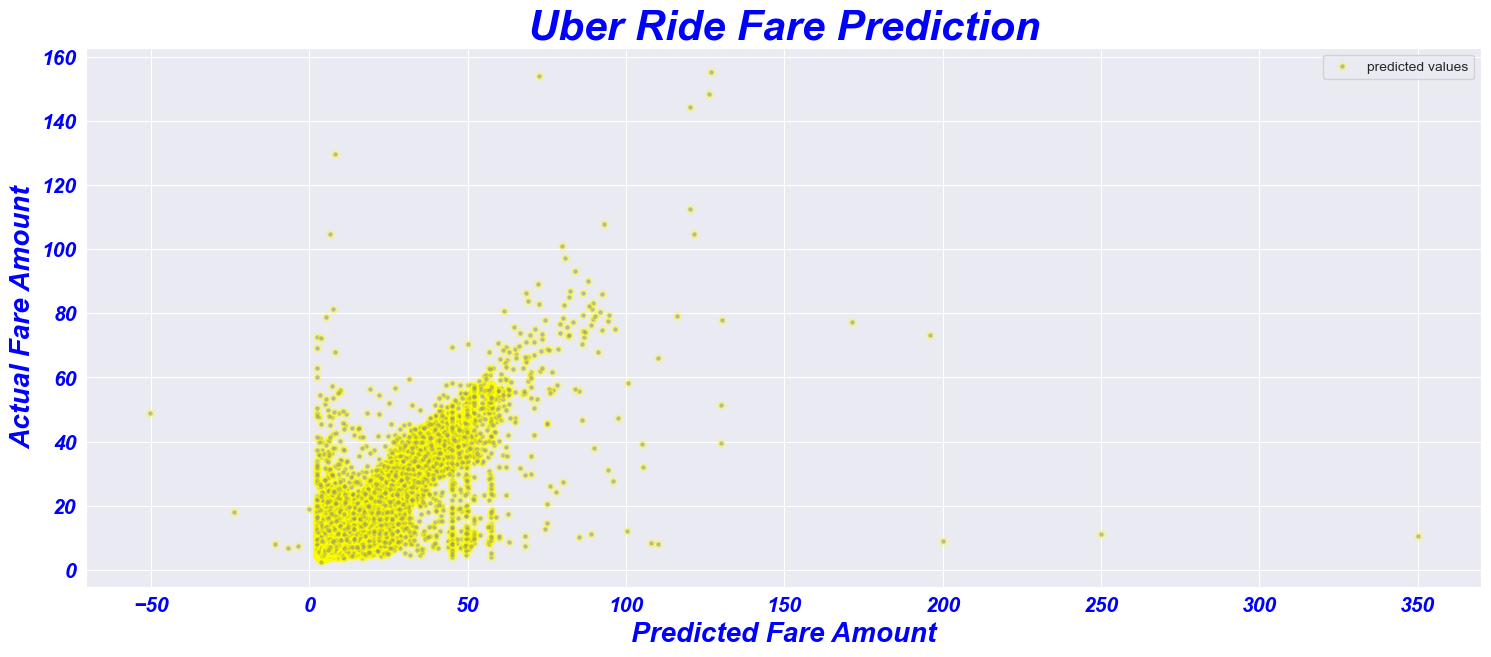

In [114]:
plt.figure(figsize=(18,7))
plt.scatter(y_test, rfmodel_pred, color='blue', linewidth=3, label='predicted values', alpha=0.4, marker='o', s=10, edgecolor='yellow')
plt.Normalize()
plt.legend() # specifying the variable on markers 
plt.grid()
plt.title('Uber Ride Fare Prediction', fontsize=30, color='blue', fontweight='bold', style='italic')
plt.ylabel('Actual Fare Amount', fontsize=20, color='blue', fontweight='bold', style='italic') # labelling the y axis
plt.xlabel('Predicted Fare Amount', fontsize=20, color='blue', fontweight='bold', style='italic') #labelling the x axis
plt.xticks(fontsize=15, color='blue', fontweight='bold', style='italic') # stylizing the x axis
plt.yticks(fontsize=15, color='blue', fontweight='bold', style='italic') # stylizing the y axis
plt.show()

In [115]:
# creating a separate dataframe for linear regression actual and predicted values
model4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
model4

,Actual,Predicted
0,5.5,11.754968
1,11.3,10.260674
2,6.5,12.693301
3,18.1,11.093626
4,11.3,8.614586
...,...,...
59995,7.3,10.503410
59996,10.1,11.005358
59997,5.7,8.915816
59998,10.9,11.460438


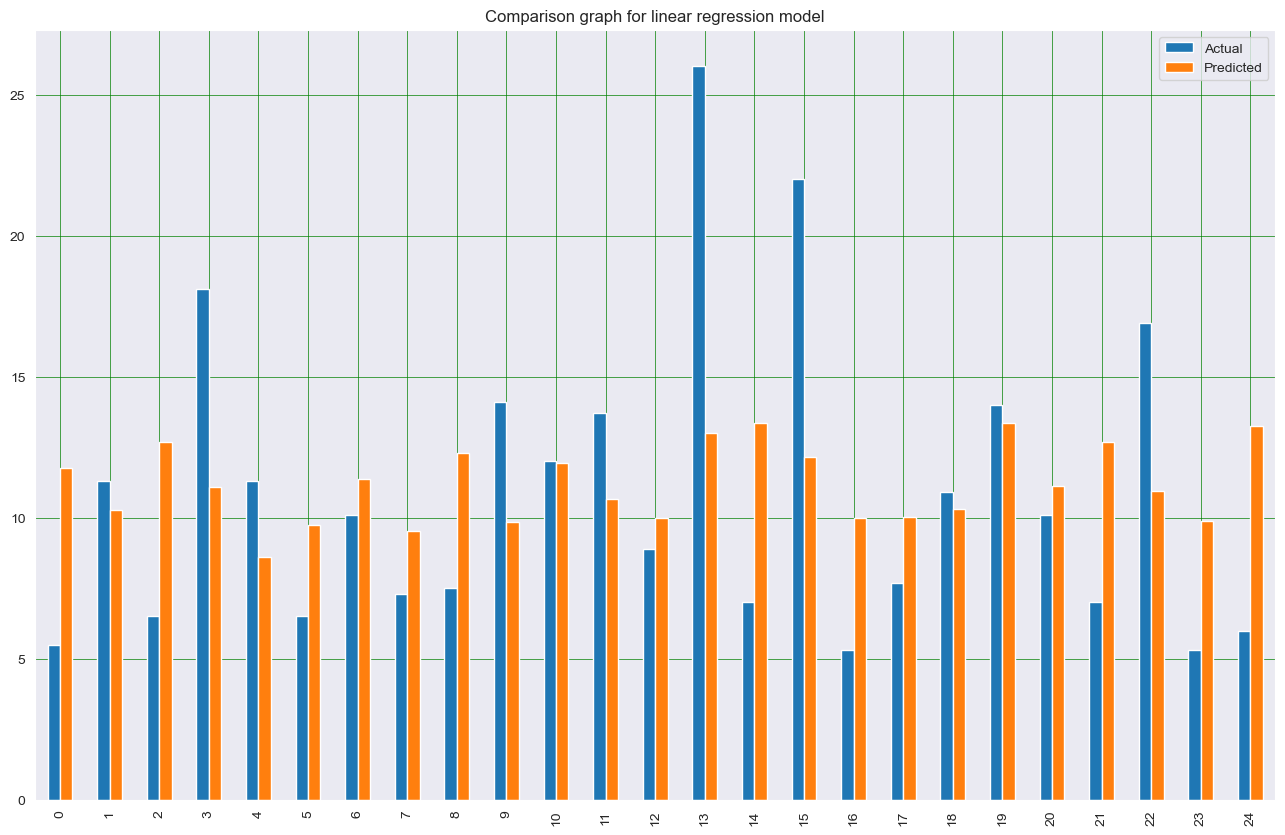

In [116]:
# plotting a bar graph with the above dataframe to visualize the actual and predicted fare values
# plot for linear regression
cmpr = model4.head(25)
cmpr.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Comparison graph for linear regression model')
plt.show()

In [117]:
# creating a separate dataframe for random forest actual and predicted values
modelran = pd.DataFrame({'Actual': y_test, 'Predicted': rfmodel_pred.flatten()})
modelran

,Actual,Predicted
0,5.5,5.825
1,11.3,9.919
2,6.5,7.155
3,18.1,5.252
4,11.3,12.478
...,...,...
59995,7.3,8.829
59996,10.1,9.228
59997,5.7,6.165
59998,10.9,11.293


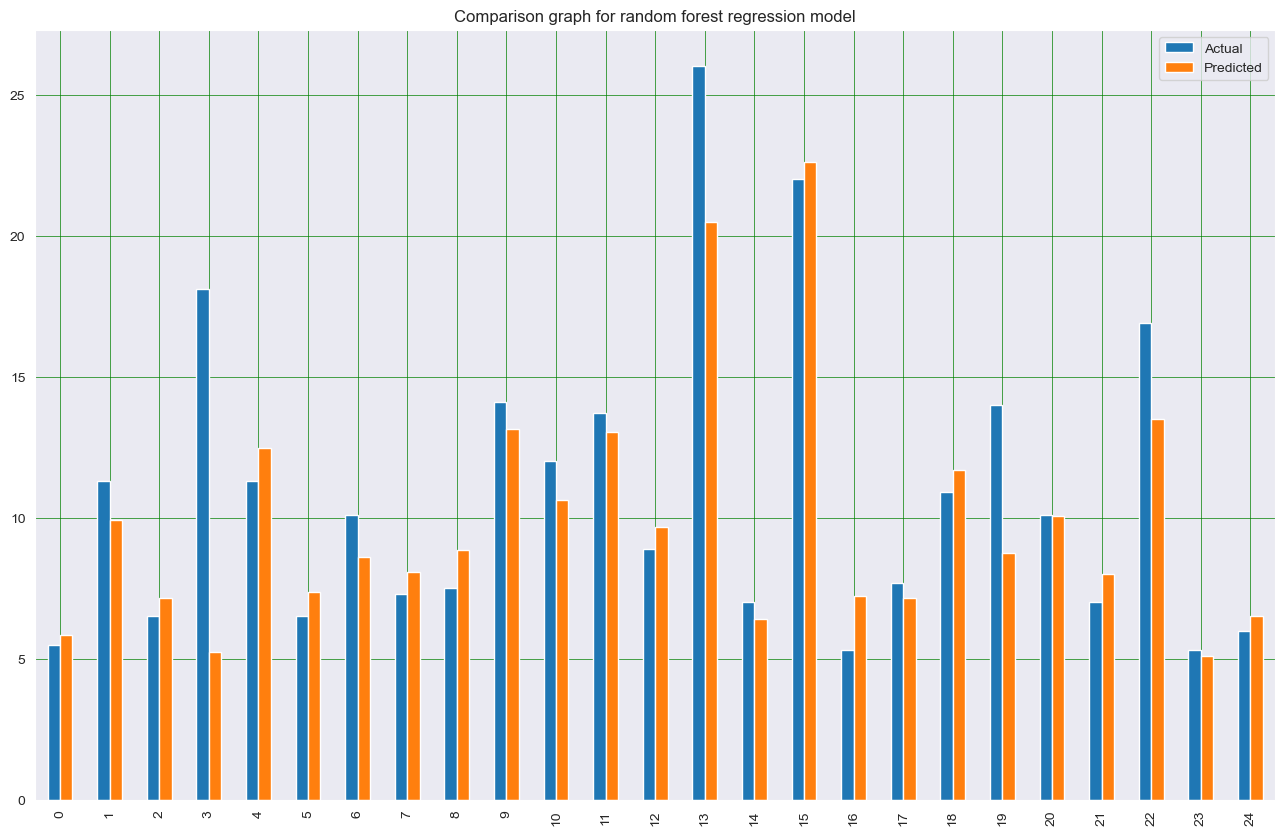

In [118]:
# plotting a bar graph with the above dataframe to visualize the actual and predicted fare values
# plot for random forest
rfr = modelran.head(25)
rfr.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Comparison graph for random forest regression model')
plt.show()